In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [138]:
x = 5 * (np.random.rand(1000) - 0.5)
y = 5 * (np.random.rand(1000) - 0.5)
z = []
for i in range(1000):
    if (x[i] < 0) & (y[i] < 0):
    #if (x[i] ** 2 + y[i] ** 2 < 5):    
    #if (x[i] ** 2 + x[i] * y[i] * np.exp(x[i]) < .5):
        z.append(0)
    else:
        z.append(1)

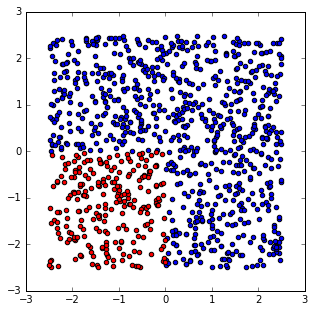

In [139]:
df = pd.DataFrame([x, y, z]).transpose()
df.columns = ['x', 'y', 'z']
df.head()
plt.figure(figsize=(5, 5))
plt.scatter(df[df.z == 1].x, df[df.z == 1].y, c='b')
plt.scatter(df[df.z == 0].x, df[df.z == 0].y, c='r')

In [146]:
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import neighbors

#clf_name = 'neighbors'
#clf_name = 'decision'
clf_name = 'random_forest'


if clf_name == 'decision':
    clf = DecisionTreeClassifier()
    print(clf_name)
elif clf_name == 'random_forest':
    ns = np.arange(10, 100, 10)
    ds = np.arange(5, 20, 5)    
    nmax, dmax, m = 0, 0, 0    
    for n in ns:
        #print(n)
        for d in ds:
            clf = RandomForestClassifier(n_estimators=n, max_depth=d)
            X_train, X_test, y_train, y_test = cross_validation.train_test_split(df[['x', 'y']], df.z, test_size=0.4)
            clf.fit(X_train, y_train)
            score = clf.score(X_test, y_test)
            if score > m:
                nmax, dmax, m = n, d, score

    print(clf_name, nmax, dmax, m)
    clf = RandomForestClassifier(n_estimators=nmax, max_depth=dmax)
elif clf_name == 'neighbors':    
    nmax, m, wmax = 0, 0, ''
    for n in np.arange(1, 20, 1):
        for w in ['uniform', 'distance']:
            clf = neighbors.KNeighborsClassifier(n_neighbors=n, weights=w)
            clf.fit(X_train, y_train)
            score = clf.score(X_test, y_test)
            if score > m:
                nmax, m, wmax = n, score, w

    print(clf_name, nmax, wmax, m)
    clf = neighbors.KNeighborsClassifier(n_neighbors=nmax, weights=wmax)

random_forest 10 5 1.0


In [141]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(df[['x', 'y']], df.z, test_size=0.4)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

1.0

In [142]:
# exam_n = 100
# x_exam = 5 * (np.random.rand(exam_n) - 0.5)
# y_exam = 5 * (np.random.rand(exam_n) - 0.5)
# exam = pd.DataFrame(np.vstack([x_exam, y_exam])).transpose()
# exam.columns = ['x', 'y']
# exam['res'] = clf.predict(exam)
# plt.scatter(exam[exam.res == 1].x, exam[exam.res == 1].y, c='b')
# plt.scatter(exam[exam.res == 0].x, exam[exam.res == 0].y, c='r')

In [143]:
cm = plt.cm.RdBu
x_min, y_min = -3, -3
x_max, y_max = 3, 3
h = 0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
x_exam, y_exam = xx.ravel(), yy.ravel()
exam = pd.DataFrame(np.vstack([x_exam, y_exam])).transpose()
exam.columns = ['x', 'y']
exam['res'] = clf.predict_proba(exam)[:, 1:]
exam.head()

,x,y,res
0,-3.00,-3,0
1,-2.99,-3,0
2,-2.98,-3,0
3,-2.97,-3,0
4,-2.96,-3,0


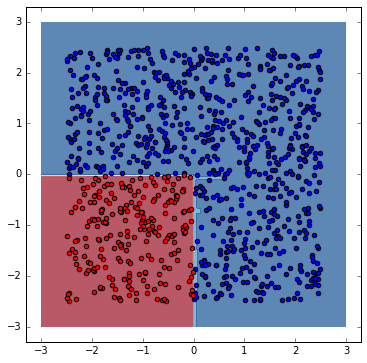

In [144]:
plt.figure(figsize=(6, 6))
Z = exam.res.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.7)
plt.scatter(df[df.z == 1].x, df[df.z == 1].y, c='b')
plt.scatter(df[df.z == 0].x, df[df.z == 0].y, c='r')